# sklearn.ensemble.RandomForestRegressor
- A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve

from sklearn.ensemble import RandomForestRegressor

In [2]:
Data=pd.read_csv('Result_dataset_130.csv')
Head = Data.columns[14]
features = Data.columns[0:13]

X = Data[features]
y= Data[Head]

# Validation curves

In [265]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# n_estimators
- int, default=100
- The number of trees in the forest.

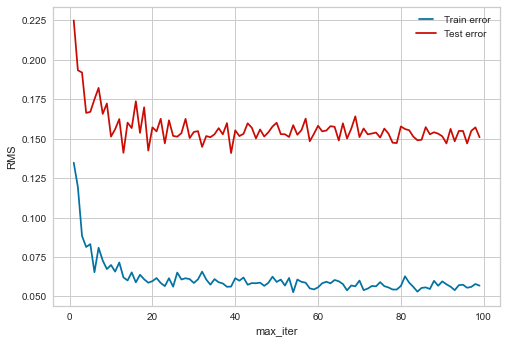

In [266]:
learning_rates = np.arange(1, 100, 1)
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(n_estimators=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_iter')
plt.show()

## criterion{“mse”, “mae”}, 
- default=”mse”
- The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error.

In [267]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

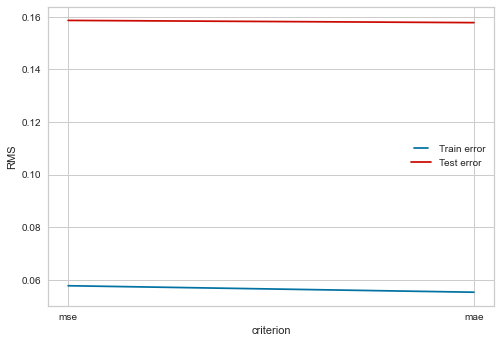

In [268]:
learning_rates = ['mse','mae']
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(criterion=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('criterion')
plt.show()

# Max_depth
- int, default=None
- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [269]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

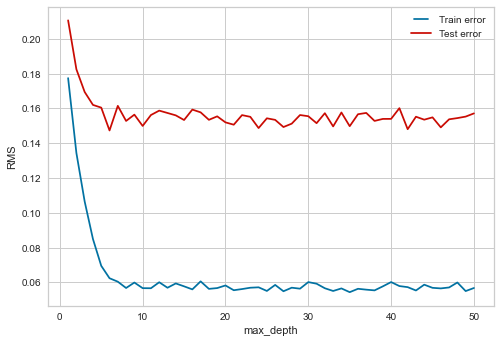

In [270]:
learning_rates = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(max_depth=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_depth')
plt.show()

## min_sample_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# min_samples_split
- int or float, default=2
- The minimum number of samples required to split an internal node:
- If int, then consider min_samples_split as the minimum number.
- If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

In [271]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

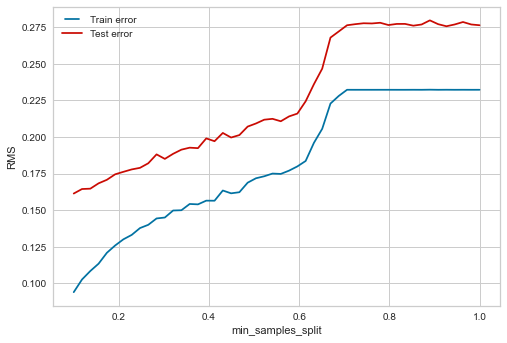

In [272]:
learning_rates = np.linspace(0.1, 1, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(min_samples_split=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_split')
plt.show()

# min_samples_leaf
- int or float, default=1
- The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [273]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

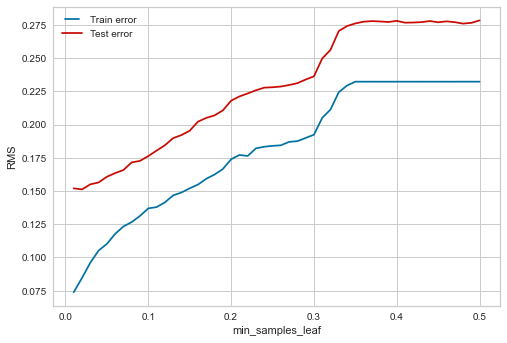

In [274]:
learning_rates = np.linspace(0.01, 0.5, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(min_samples_leaf=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_leaf')
plt.show()

---
---

# Random Hyperparameter Grid

In [276]:
X=Data[features]
y=Data[Head]

In [277]:
HIC:
n_estimators = [5,10,15,20,25,30,40]
max_features = ['auto','sqrt']
max_depth = [10,20,25,30,35,40,45]
min_samples_split = [0.01,0.02,0.03,0.04,0.06,0.07,0.09,0.1]
min_samples_leaf = [0.001,0.002,0.003,0.005,0.008,0.009,0.01,0.02]
criterion=['mse','mae']
warm_start=[True,False]
oob_score=[True,False]
bootstrap = [True,False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'warm_start': warm_start,
               'oob_score': oob_score,
               'bootstrap': bootstrap}

In [278]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 1271 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   30.0s finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [5, 10, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [0.009, 0.01, 0.02,
                                                             0.03, 0.05],
                                        'min_samples_split': [0.05, 0.06, 0.07,
                                                              0.08, 0.09, 0.1],
                                        'n_estimators': [5, 10, 15, 20, 30, 40,
                                                         50, 60],
                                        'oob_score': [True, False],
                                        'warm_start': [True, False]},
                  

In [279]:
rf_random.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=20, min_samples_leaf=0.02,
                      min_samples_split=0.06, n_estimators=60, oob_score=True,
                      warm_start=True)

In [280]:
rf_random.best_params_

{'warm_start': True,
 'oob_score': True,
 'n_estimators': 60,
 'min_samples_split': 0.06,
 'min_samples_leaf': 0.02,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'mae',
 'bootstrap': True}

In [45]:
Data=pd.read_csv('Result_dataset_130.csv')
Head = Data.columns[14]
X=Data[features]
y=Data[Head]

In [47]:


# HIC
mod=RandomForestRegressor(max_depth=10, min_samples_leaf=0.005, min_samples_split=0.09,
                      n_estimators=30,warm_start=True,bootstrap=True,oob_score=True,criterion='mse')

In [48]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [49]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=19)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error')


<Figure size 576x396 with 0 Axes>

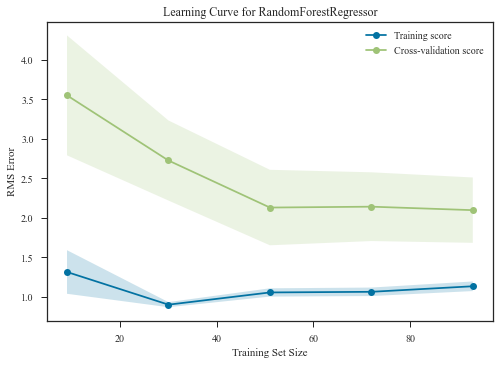

In [50]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [51]:
X = X.to_numpy()
y = y.to_numpy()

In [52]:
y_Test=y_Test.to_numpy()

In [53]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 2.755424

Root Mean squared error: 2.536092

Root Mean squared error: 2.882260

Root Mean squared error: 2.392290

Root Mean squared error: 3.127447

Root Mean squared error: 1.515546

Root Mean squared error: 2.916911

Root Mean squared error: 2.268115

Root Mean squared error: 2.853633

Root Mean squared error: 2.632750

error COV--->0    0.801746
dtype: float64  error mean --->0    1.712922
Name: mean, dtype: float64  error std --->0    1.373329
Name: std, dtype: float64


In [54]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    0.752042
dtype: float64  error mean --->0    1.280215
Name: mean, dtype: float64  error std --->0    0.962775
Name: std, dtype: float64


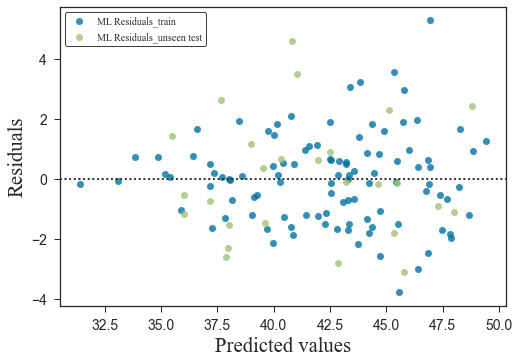

In [55]:
plt.figure()

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

leg = plt.legend(frameon=True,loc='best')
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(False)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.xlim([90,600])
# plt.ylim([-250,250])
# plt.savefig('repimg/hic_130_resT', bbox_inches="tight")
plt.show()

---
---

# Grid search

In [289]:
## HIC
n_estimators = [10,20,25,30]
max_features = ['auto','sqrt']
max_depth = [2,4,6,8,10]
min_samples_split = [0.04,0.06,0.08,0.09]
min_samples_leaf = [0.001,0.002,0.003,0.004,0.005]
criterion=['mse','mae']
warm_start=[True,False]
oob_score=[True,False]
bootstrap = [True,False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'warm_start': warm_start,
               'oob_score': oob_score,
               'bootstrap': bootstrap}

In [294]:
Data=pd.read_csv('Result_dataset_130.csv')
Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]
features = Data.columns[0:13]
X=Data[features]
y=Data[Chest_deflection]

In [291]:
rf = RandomForestRegressor()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)

Fitting 10 folds for each of 4608 candidates, totalling 46080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [0.009, 0.01, 0.02],
                         'min_samples_split': [0.04, 0.05, 0.06],
                         'n_estimators': [60, 65, 70, 75],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [292]:
reg.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 0.02,
 'min_samples_split': 0.04,
 'n_estimators': 65,
 'oob_score': False,
 'warm_start': False}

In [293]:
reg.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=0.02,
                      min_samples_split=0.04, n_estimators=65)

---
---

In [9]:
Data=pd.read_csv('Result_dataset_130.csv')
Head = Data.columns[14]
features = Data.columns[0:13]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]
X = Data[features]
y= Data[Chest_deflection]

In [10]:

## HIC
mod=RandomForestRegressor(max_depth=4, min_samples_leaf=0.001, min_samples_split=0.09,criterion='mse',bootstrap=True,max_features='auto',n_estimators=25, oob_score=True,warm_start=True)


## Learning Curve

In [11]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=22)
kf=cv

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [24]:

train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error')



<Figure size 576x396 with 0 Axes>

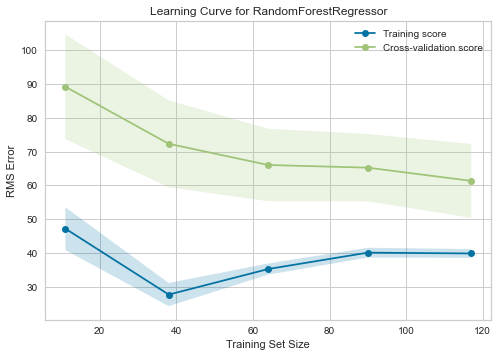

In [25]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [12]:
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('repimg/nkfrc_130_L', bbox_inches="tight")
plt.show()

## Unknown data test

In [13]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 2.096567

Root Mean squared error: 2.753298

Root Mean squared error: 1.789975

Root Mean squared error: 1.797389

Root Mean squared error: 2.507465

Root Mean squared error: 2.485255

Root Mean squared error: 2.781505

Root Mean squared error: 2.787276

Root Mean squared error: 2.832132

Root Mean squared error: 1.556406

error COV--->0    0.709256
dtype: float64  error mean --->0    1.900832
Name: mean, dtype: float64  error std --->0    1.348177
Name: std, dtype: float64


# train score

In [14]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    0.732064
dtype: float64  error mean --->0    0.833765
Name: mean, dtype: float64  error std --->0    0.610369
Name: std, dtype: float64


In [30]:
act=abs(nam.loc['mean'][sd])
new=abs(Data[sd].values)

C:\Users\ypyas\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


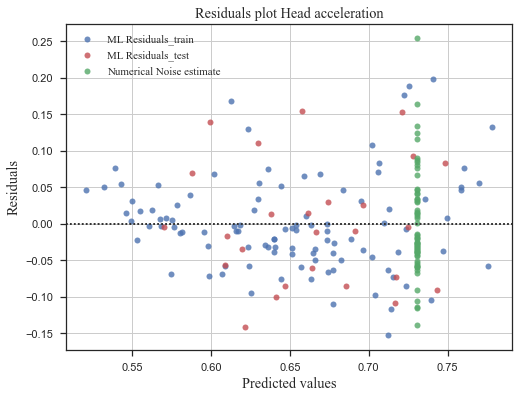

In [31]:
mean=abs(a.loc['mean'])
std=a.loc['std']
csfont = {'fontname':'Times New Roman'}
plt.figure(figsize=(8, 6))

sns.set_theme(style="ticks")
sns.residplot(y=abs(y), x=abs(ytr),color="b",label='ML Residuals_train')
sns.residplot(y=abs(y_Test), x=abs(ytestunk),color="r",label='ML Residuals_test')
# plt.errorbar(mean, 0, yerr=std, fmt='.k');
# sns.residplot(x=np.ones(50)*ass.loc['mean']['HIC 15'], y=df['HIC 15'].to_numpy(), lowess=True, color="g",label='Numerical noise')
sns.residplot(x=np.ones(len(new))*new.mean(), y=new, lowess=True, color="g",label='Numerical Noise estimate')

plt.title('Residuals plot Head acceleration', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()
plt.grid()
plt.savefig('resk1.png')
plt.show()